In [1]:
# Importamos las bibliotecas que vamos a usar
#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
import os

In [2]:
# Definimos los arrays principales que vamos a usar
tiempos = np.array([])
co2 = np.array([])    # (ppm)

estado_valvula_1 =  np.array([])
estado_valvula_2 =  np.array([])
estado_valvula_3 =  np.array([])
estado_valvula_4 =  np.array([])

temp_suncho = np.array([])

temp_compost_1 = np.array([])
temp_compost_2 = np.array([])
temp_compost_3 = np.array([])
temp_compost_4 = np.array([])

estado_suncho = np.array([])    # Apagado: 0, Prendido: 1

In [3]:
# Definamos la carpeta con las mediciones como PATH
fecha='2022-03-23_10-11-20'
PATH = f"./measurements/full-x4/{fecha}"
#/PRUEBA_1254-1354

# Creamos una carpeta para las figuras (si es que no existe)
if not os.path.isdir(f"{PATH}/figuras"):
    os.makedirs(f"{PATH}/figuras")

In [4]:
# Veamos el primer archivo csv como ejemplo
df0 = pd.read_csv(f"{PATH}/data_2.csv")
display(df0)

,Date_Time,CO2,Estado_Valvula_1,Estado_Valvula_2,Estado_Valvula_3,Estado_Valvula_4,Temp_Compost_1,Temp_Compost_2,Temp_Compost_3,Temp_Compost_4,Temp_Suncho,Estado_Suncho
0,23/03/2022_10:30:49,814,Apagado,Apagado,Apagado,Apagado,44.06,49.88,49.25,37.88,47.69,Prendido
1,23/03/2022_10:30:55,814,Apagado,Apagado,Apagado,Apagado,44.06,49.81,49.25,37.88,47.63,Prendido
2,23/03/2022_10:31:01,815,Apagado,Apagado,Apagado,Apagado,44.00,49.81,49.19,37.88,47.63,Prendido
3,23/03/2022_10:31:07,815,Apagado,Apagado,Apagado,Apagado,44.00,49.75,49.19,38.00,47.63,Prendido
4,23/03/2022_10:31:12,814,Apagado,Apagado,Apagado,Apagado,44.00,49.75,49.19,37.94,47.56,Prendido
...,...,...,...,...,...,...,...,...,...,...,...,...
95,23/03/2022_10:40:06,815,Apagado,Apagado,Apagado,Apagado,42.63,48.00,47.44,45.13,45.81,Prendido
96,23/03/2022_10:40:11,815,Apagado,Apagado,Apagado,Apagado,42.63,48.00,47.44,45.19,45.81,Prendido
97,23/03/2022_10:40:17,816,Apagado,Apagado,Apagado,Apagado,42.63,48.06,47.44,45.19,45.75,Prendido
98,23/03/2022_10:40:23,817,Apagado,Apagado,Apagado,Apagado,42.56,47.94,47.38,45.19,45.75,Prendido


In [5]:
# Antes de llenar los arrays vamos a necesitar una función que convierta un tiempo en el formato que usamos en tiempo absoluto para poder comparar las mediciones entre sí
def convertirTiempo(t_i, t):
    dia = int(t[:2])
    mes = int(t[3:5])
    ano = int(t[6:10])
    hora = int(t[11:13])
    minuto = int(t[14:16])
    segundo = int(t[17:])
    
    t_abs = segundo + 60 * minuto + (60 ** 2) * hora + 24 * (60 ** 2) * dia + 30 * 24 * (60 ** 2) * mes + 12 * 30 * 24 * (60 ** 2) * ano
    return t_abs - t_i


# Definamos el tiempo inicial
datetime0 = np.transpose(df0["Date_Time"].to_numpy())[0]
t_i = convertirTiempo(0, datetime0)
print(datetime0)

23/03/2022_10:30:49


In [6]:
# Contemos la cantidad de csv's  que llenamos
n = 0
for file in os.listdir(PATH):
    if file.endswith(".csv"):
        n += 1

print(n)

19


In [7]:
# Llenemos las listas con los datos
for i in range(n):
    i=i
    df = pd.read_csv(f"{PATH}/data_{i}.csv")

    # CO2
    co2 = np.concatenate((co2, np.transpose(df["CO2"].to_numpy())))

    # Tiempo
    for t in np.transpose(df["Date_Time"].to_numpy()):
        tiempos = np.concatenate((tiempos, np.array([convertirTiempo(t_i, t)])))
        
    # Temperaturas
    temp_suncho = np.concatenate((temp_suncho, np.transpose(df["Temp_Suncho"].to_numpy())))
    temp_compost_1 = np.concatenate((temp_compost_1, np.transpose(df["Temp_Compost_1"].to_numpy())))
    temp_compost_2 = np.concatenate((temp_compost_2, np.transpose(df["Temp_Compost_2"].to_numpy())))
    temp_compost_3 = np.concatenate((temp_compost_3, np.transpose(df["Temp_Compost_3"].to_numpy())))
    temp_compost_4 = np.concatenate((temp_compost_4, np.transpose(df["Temp_Compost_4"].to_numpy())))
    
    
    # Estados
    for e in np.transpose(df["Estado_Valvula_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_1 = np.concatenate((estado_valvula_1, np.array([1])))
        else:
            estado_valvula_1 = np.concatenate((estado_valvula_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_2 = np.concatenate((estado_valvula_2, np.array([1])))
        else:
            estado_valvula_2 = np.concatenate((estado_valvula_2, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_3 = np.concatenate((estado_valvula_3, np.array([1])))
        else:
            estado_valvula_3 = np.concatenate((estado_valvula_3, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_4 = np.concatenate((estado_valvula_4, np.array([1])))
        else:
            estado_valvula_4 = np.concatenate((estado_valvula_4, np.array([0])))
    
    
    for e in np.transpose(df["Estado_Suncho"].to_numpy()):
        if e == "Prendido":
            estado_suncho = np.concatenate((estado_suncho, np.array([1])))
        else:
            estado_suncho = np.concatenate((estado_suncho, np.array([0])))

In [8]:
estado_valvula_1

array([0., 0., 0., ..., 1., 1., 1.])

In [9]:
#Encuentro dónde se hace la danza de las válvulas, para hacerle una marca en los gráficos
#Parece hincha pelotas así como está ahora, pero después lo voy a necesitar así que me conviene definirlo así

pos1 = np.where(np.diff(estado_valvula_1) == 1) #encuentro el número de posición del primer momento de la danza
pos2 = np.where(np.diff(estado_valvula_2) == 1) #y así con los demás
pos3 = np.where(np.diff(estado_valvula_3) == 1)
pos4 = np.where(np.diff(estado_valvula_4) == 1)
#pos5 = np.where(np.diff(estado_valvula_compost_4) == 1)

pos = [] #los guardo ordenados
for i in range(len(pos1[0])):
    pos.append(int(pos1[0][i]))
    pos.append(int(pos2[0][i]))
    pos.append(int(pos3[0][i]))
    pos.append(int(pos4[0][i]))
#    pos.append(int(pos5[0][i]))

danza = [] #guardo los tiempos para graficarlos y visualizarlos rápidamente
for i in range(len(pos)):
    danza.append(tiempos[pos[i]])

IndexError: index 1 is out of bounds for axis 0 with size 1

# Graficos

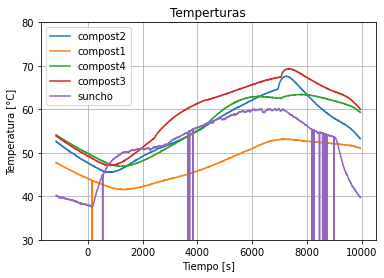

In [10]:
plt.figure("Temperaturas")
plt.title("Temperturas")
plt.plot(tiempos, temp_suncho, '-', markersize=1, label='compost2')
plt.plot(tiempos, temp_compost_1, '-', markersize=1, label='compost1')
plt.plot(tiempos, temp_compost_2, '-', markersize=1, label='compost4')
plt.plot(tiempos, temp_compost_3, '-', markersize=1, label='compost3')
plt.plot(tiempos, temp_compost_4, '-', markersize=1, label='suncho')
plt.legend()
plt.grid()
plt.ylim(30,80)
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.savefig(f"{PATH}/figuras/Temperatura.png")
plt.show()

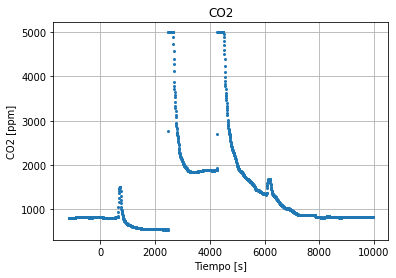

In [12]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, ".",markersize=4)
#for i in range(len(danza)):
#    plt.vlines(x=danza[i], ymin=0, ymax=3000, color="r")
plt.grid()

plt.ylim(600,1000)
plt.xlim(18000,22000)
plt.xlabel("Tiempo [s]")
plt.ylabel("CO2 [ppm]")
plt.savefig(f"{PATH}/figuras/CO2_cortado.png")
plt.show()

In [ ]:
len(co2)

In [34]:
len(tiempos)

31600